In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


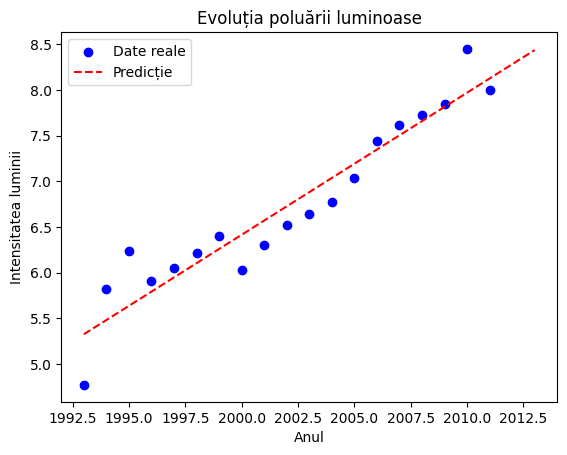

Predicție pentru 2012: 8.28
Predicție pentru 2013: 8.44


In [3]:
# 1. Funcție pentru a procesa imaginile și a extrage intensitatea medie a luminii
def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Conversie în grayscale
    img = cv2.resize(img, (100, 100))  # Redimensionare pentru uniformitate
    return np.mean(img)  # Calculul intensității medii a pixelilor

# 2. Încărcarea și prelucrarea imaginilor
years = list(range(1993, 2012))  # Ani disponibili
intensities = []

for year in years:
    image_path = f"/content/cairo_{year}.jfif"  # Modifică dacă locația este alta
    if os.path.exists(image_path):
        intensity = process_image(image_path)
        intensities.append(intensity)
    else:
        print(f"Imaginea pentru {year} nu a fost găsită!")

# 3. Antrenarea modelului de regresie liniară
X = np.array(years).reshape(-1, 1)
y = np.array(intensities)
model = LinearRegression()
model.fit(X, y)

# 4. Predicția pentru 2012 și 2013
future_years = np.array([2012, 2013]).reshape(-1, 1)
predictions = model.predict(future_years)

# 5. Vizualizarea rezultatelor
plt.scatter(years, intensities, color='blue', label='Date reale')
plt.plot(years + [2012, 2013], model.predict(np.array(years + [2012, 2013]).reshape(-1, 1)), color='red', linestyle='dashed', label='Predicție')
plt.xlabel("Anul")
plt.ylabel("Intensitatea luminii")
plt.title("Evoluția poluării luminoase")
plt.legend()
plt.show()

# 6. Afișarea predicțiilor
for i, year in enumerate(future_years.flatten()):
    print(f"Predicție pentru {year}: {predictions[i]:.2f}")


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 0.23
Root Mean Squared Error (RMSE): 0.28


In [5]:
actual_intensities = []
for year in [2012, 2013]:
    image_path = f"/content/cairo_{year}.jfif"
    if os.path.exists(image_path):
        intensity = process_image(image_path)
        actual_intensities.append(intensity)
        print(f"Intensitatea reală pentru {year}: {intensity:.2f}")
    else:
        print(f"Imaginea pentru {year} nu a fost găsită!")


Intensitatea reală pentru 2012: 8.35
Intensitatea reală pentru 2013: 8.74
